## Project Summary 
-- Your goal ifor this project if to create an Artificial Neural Network that will use the OPEN for the  Capital Markets and Volatility to predict the ClOSE for the 10 year Treasury (20 year tome frame)
-- Does these markes provide predictive insites on the the 10 Year Treasury Yield? 
-- How is the model impacted with the addition of Volitily, GOLD, OIL etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [2]:
capital_tickers = ["^GSPC","^DJI", "^IXIC","^RUT"]
## "CL=F", "GC=F","SI=F","EURUSD=X"

In [3]:
capital_data = pd.DataFrame()

In [4]:
for t in capital_tickers:
    capital_data[t] = web.DataReader(t, data_source="yahoo", start = "1990-1-1")["Open"]

In [5]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
1990-01-02,353.399994,2748.719971,452.899994,168.309998
1990-01-03,359.690002,2814.199951,461.100006,169.960007
1990-01-04,358.760010,2804.389893,460.399994,170.779999
1990-01-05,355.670013,2786.899902,457.899994,170.089996
1990-01-08,352.200012,2761.729980,457.100006,169.669998
...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980


## Checking for missing Data
- Below we can see there is data missing from a few features so we ill need to take that into consideration when training our model

In [6]:
capital_data.isnull().sum()

^GSPC    0
^DJI     0
^IXIC    0
^RUT     1
dtype: int64

In [7]:
capital_data.dropna(inplace=True)

In [8]:
capital_data.corr()

,^GSPC,^DJI,^IXIC,^RUT
^GSPC,1.000000,0.994446,0.978819,0.967169
^DJI,0.994446,1.000000,0.965997,0.978485
^IXIC,0.978819,0.965997,1.000000,0.935275
^RUT,0.967169,0.978485,0.935275,1.000000


### Feature Generation 
- Wiull calculate and generate the 20 day moving average for each index 
- Will also calculate the upper and lower averages for a bolenger band to assist in  improving the prediciton

In [9]:
for x in list(capital_data.columns):
    capital_data[f"{x} 20day MA"] = capital_data[f"{x}"].rolling(20).mean()

In [10]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA
Date,,,,,,,,
1990-01-02,353.399994,2748.719971,452.899994,168.309998,NaN,NaN,NaN,NaN
1990-01-03,359.690002,2814.199951,461.100006,169.960007,NaN,NaN,NaN,NaN
1990-01-04,358.760010,2804.389893,460.399994,170.779999,NaN,NaN,NaN,NaN
1990-01-05,355.670013,2786.899902,457.899994,170.089996,NaN,NaN,NaN,NaN
1990-01-08,352.200012,2761.729980,457.100006,169.669998,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,3374.780994,27832.424902,11172.250977,1546.718488
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,3376.905493,27847.010449,11189.140967,1550.698987
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980,3384.237488,27883.837500,11237.429980,1555.115985


### Adding upper and lower Bollinger Values and considering Volitility

## Upper

In [11]:
for x in capital_tickers:
    capital_data[f"{x} upper"] = capital_data[f"{x}"].rolling(20).mean() + 2*(capital_data[f"{x}"].rolling(20).std())

In [12]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA,^GSPC upper,^DJI upper,^IXIC upper,^RUT upper
Date,,,,,,,,,,,,
1990-01-02,353.399994,2748.719971,452.899994,168.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,2814.199951,461.100006,169.960007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,2804.389893,460.399994,170.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,2786.899902,457.899994,170.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,2761.729980,457.100006,169.669998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,3374.780994,27832.424902,11172.250977,1546.718488,3544.703644,29048.884547,11948.317662,1673.335072
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,3376.905493,27847.010449,11189.140967,1550.698987,3549.783711,29080.407353,11984.243796,1681.273245
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980,3384.237488,27883.837500,11237.429980,1555.115985,3564.049707,29158.901164,12049.148236,1691.459798


## Lower

In [13]:
for x in capital_tickers:
    capital_data[f"{x} lower"] = capital_data[f"{x}"].rolling(20).mean() - 2*(capital_data[f"{x}"].rolling(20).std())

In [14]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA,^GSPC upper,^DJI upper,^IXIC upper,^RUT upper,^GSPC lower,^DJI lower,^IXIC lower,^RUT lower
Date,,,,,,,,,,,,,,,,
1990-01-02,353.399994,2748.719971,452.899994,168.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,2814.199951,461.100006,169.960007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,2804.389893,460.399994,170.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,2786.899902,457.899994,170.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,2761.729980,457.100006,169.669998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,3374.780994,27832.424902,11172.250977,1546.718488,3544.703644,29048.884547,11948.317662,1673.335072,3204.858343,26615.965258,10396.184291,1420.101903
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,3376.905493,27847.010449,11189.140967,1550.698987,3549.783711,29080.407353,11984.243796,1681.273245,3204.027275,26613.613546,10394.038137,1420.124729
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980,3384.237488,27883.837500,11237.429980,1555.115985,3564.049707,29158.901164,12049.148236,1691.459798,3204.425268,26608.773836,10425.711725,1418.772172


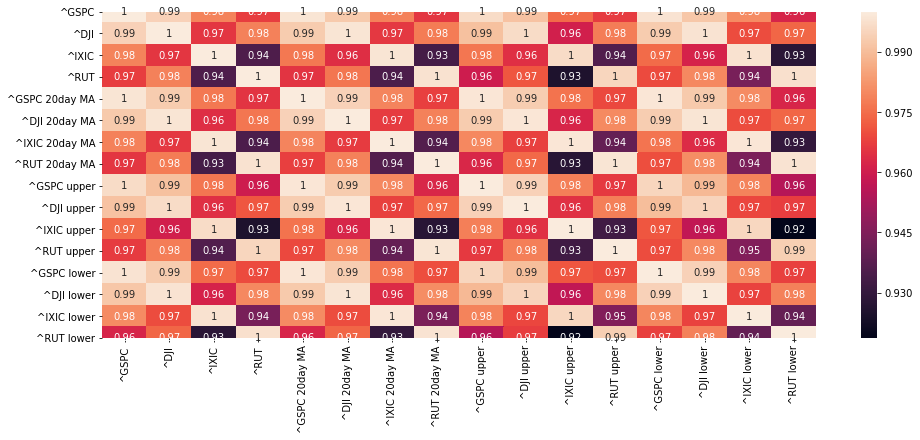

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(capital_data.corr(), annot=True)

## Putting the data Together
- Now that the data is ready the Capital Markets we need the close for the 10 Year

In [16]:
tenYearData = web.DataReader("^TNX", data_source="yahoo", start= "2001-1-1")["Adj Close"]

### Combining the Data 
- adding the 10 year ADJ Close data to the Capital Markets data set
- This will be our working Data

In [17]:
working_data = pd.concat([capital_data, tenYearData], axis=1)

In [18]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA,^GSPC upper,^DJI upper,^IXIC upper,^RUT upper,^GSPC lower,^DJI lower,^IXIC lower,^RUT lower,Adj Close
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,2748.719971,452.899994,168.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,2814.199951,461.100006,169.960007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,2804.389893,460.399994,170.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,2786.899902,457.899994,170.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,2761.729980,457.100006,169.669998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,3374.780994,27832.424902,11172.250977,1546.718488,3544.703644,29048.884547,11948.317662,1673.335072,3204.858343,26615.965258,10396.184291,1420.101903,0.722
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,3376.905493,27847.010449,11189.140967,1550.698987,3549.783711,29080.407353,11984.243796,1681.273245,3204.027275,26613.613546,10394.038137,1420.124729,0.731
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980,3384.237488,27883.837500,11237.429980,1555.115985,3564.049707,29158.901164,12049.148236,1691.459798,3204.425268,26608.773836,10425.711725,1418.772172,0.744


### Analyzing the Data 
- Currently we see there is missing data we need to consider removing
- lets see how to go about this
- First lets fix the columns 

In [19]:
working_data.columns

Index(['^GSPC', '^DJI', '^IXIC', '^RUT', '^GSPC 20day MA', '^DJI 20day MA',
       '^IXIC 20day MA', '^RUT 20day MA', '^GSPC upper', '^DJI upper',
       '^IXIC upper', '^RUT upper', '^GSPC lower', '^DJI lower', '^IXIC lower',
       '^RUT lower', 'Adj Close'],
      dtype='object')

In [20]:
working_data.columns = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^GSPC 20day MA', '^DJI 20day MA',
       '^IXIC 20day MA', '^RUT 20day MA', '^GSPC upper', '^DJI upper',
       '^IXIC upper', '^RUT upper', '^GSPC lower', '^DJI lower', '^IXIC lower',
       '^RUT lower', 'TNX Adj Close']

### Handling missing data
- ^TNX has 288 days missing form the total 5232 days
- approximately 5% of the data so this is not siginificate to mak a huge diffference so will drop these days

In [21]:
working_data.isnull().sum()

^GSPC                1
^DJI                 1
^IXIC                1
^RUT                 1
^GSPC 20day MA      20
^DJI 20day MA       20
^IXIC 20day MA      20
^RUT 20day MA       20
^GSPC upper         20
^DJI upper          20
^IXIC upper         20
^RUT upper          20
^GSPC lower         20
^DJI lower          20
^IXIC lower         20
^RUT lower          20
TNX Adj Close     2816
dtype: int64

In [22]:
working_data.dropna(inplace=True)

In [23]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA,^GSPC upper,^DJI upper,^IXIC upper,^RUT upper,^GSPC lower,^DJI lower,^IXIC lower,^RUT lower,TNX Adj Close
Date,,,,,,,,,,,,,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,1330.939001,10652.161963,2662.785999,466.831001,1394.245083,10965.828597,3073.938160,493.652803,1267.632920,10338.495329,2251.633837,440.009200,4.917
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,1329.343500,10665.166455,2642.385999,467.114001,1395.849470,10951.206395,3092.250105,493.608947,1262.837529,10379.126515,2192.521892,440.619056,5.097
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,1330.473004,10683.574463,2636.947998,468.814001,1397.432001,10992.161664,3086.370458,495.153422,1263.514008,10374.987262,2187.525538,442.474581,5.013
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,1328.313000,10684.407959,2621.659998,469.115501,1391.707164,10995.492537,3057.013962,495.705331,1264.918837,10373.323381,2186.306033,442.525672,4.948
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,1325.657501,10685.111475,2603.681494,469.095502,1389.417516,10995.881052,3046.648396,495.703584,1261.897487,10374.341897,2160.714592,442.487419,4.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,3374.780994,27832.424902,11172.250977,1546.718488,3544.703644,29048.884547,11948.317662,1673.335072,3204.858343,26615.965258,10396.184291,1420.101903,0.722
2020-10-15,3453.719971,28323.400391,11559.879883,1618.880005,3376.905493,27847.010449,11189.140967,1550.698987,3549.783711,29080.407353,11984.243796,1681.273245,3204.027275,26613.613546,10394.038137,1420.124729,0.731
2020-10-16,3493.500000,28570.720703,11761.830078,1638.479980,3384.237488,27883.837500,11237.429980,1555.115985,3564.049707,29158.901164,12049.148236,1691.459798,3204.425268,26608.773836,10425.711725,1418.772172,0.744


### 10 Year activity over time
- Since late 2009 ther has been a stedy decline in the 10 year yield

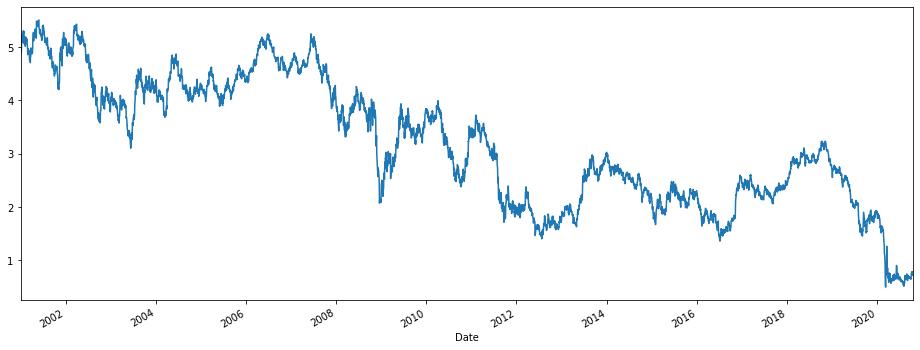

In [24]:
working_data["TNX Adj Close"].plot(figsize = (16,6))

### Preparing the data for model
- Separating X - > Features and y - > Target (TNX)

In [25]:
X = working_data.drop("TNX Adj Close", axis= 1).values
y = working_data["TNX Adj Close"].values

### Training testing and splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data to a normal Distribution

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scalar = MinMaxScaler()

In [30]:
X_train = scalar.fit_transform(X_train)

In [31]:
X_test = scalar.transform(X_test)

### Early Stopping Callback
- Will use early stopping to prevent overtraining on the training data 

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
stop = EarlyStopping("val_loss", mode="min", patience= 20)

## Creating the model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [35]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
model.compile(activation = 'adam', loss = "mse")

In [36]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=350, callbacks=[stop])

Train on 3461 samples, validate on 1484 samples
Epoch 1/350
3461/3461 [==============================] - 3s 881us/sample - loss: 10.7393 - val_loss: 10.1835
Epoch 2/350
3461/3461 [==============================] - 1s 182us/sample - loss: 8.0986 - val_loss: 6.2236
Epoch 3/350
3461/3461 [==============================] - 1s 175us/sample - loss: 4.0303 - val_loss: 2.8743
Epoch 4/350
3461/3461 [==============================] - 1s 177us/sample - loss: 2.3029 - val_loss: 1.9740
Epoch 5/350
3461/3461 [==============================] - 1s 190us/sample - loss: 1.7383 - val_loss: 1.6036
Epoch 6/350
3461/3461 [==============================] - 1s 181us/sample - loss: 1.4955 - val_loss: 1.4162
Epoch 7/350
3461/3461 [==============================] - 1s 196us/sample - loss: 1.3272 - val_loss: 1.2624
Epoch 8/350
3461/3461 [==============================] - 1s 183us/sample - loss: 1.2256 - val_loss: 1.1808
Epoch 9/350
3461/3461 [==============================] - 1s 185us/sample - loss: 1.1354 - val_

3461/3461 [==============================] - 1s 212us/sample - loss: 0.3234 - val_loss: 0.2973
Epoch 77/350
3461/3461 [==============================] - 1s 193us/sample - loss: 0.3214 - val_loss: 0.3027
Epoch 78/350
3461/3461 [==============================] - 1s 188us/sample - loss: 0.3209 - val_loss: 0.3196
Epoch 79/350
3461/3461 [==============================] - 1s 188us/sample - loss: 0.3203 - val_loss: 0.3001
Epoch 80/350
3461/3461 [==============================] - 1s 188us/sample - loss: 0.3193 - val_loss: 0.2946
Epoch 81/350
3461/3461 [==============================] - 1s 183us/sample - loss: 0.3183 - val_loss: 0.3073
Epoch 82/350
3461/3461 [==============================] - 1s 190us/sample - loss: 0.3173 - val_loss: 0.2968
Epoch 83/350
3461/3461 [==============================] - 1s 180us/sample - loss: 0.3159 - val_loss: 0.2947
Epoch 84/350
3461/3461 [==============================] - 1s 187us/sample - loss: 0.3137 - val_loss: 0.2988
Epoch 85/350
3461/3461 [=================

3461/3461 [==============================] - 1s 197us/sample - loss: 0.2690 - val_loss: 0.2541
Epoch 152/350
3461/3461 [==============================] - 1s 191us/sample - loss: 0.2688 - val_loss: 0.2509
Epoch 153/350
3461/3461 [==============================] - 1s 185us/sample - loss: 0.2685 - val_loss: 0.2776
Epoch 154/350
3461/3461 [==============================] - 1s 183us/sample - loss: 0.2685 - val_loss: 0.2579
Epoch 155/350
3461/3461 [==============================] - 1s 179us/sample - loss: 0.2675 - val_loss: 0.2617
Epoch 156/350
3461/3461 [==============================] - 1s 180us/sample - loss: 0.2683 - val_loss: 0.2549
Epoch 157/350
3461/3461 [==============================] - 1s 179us/sample - loss: 0.2676 - val_loss: 0.2532
Epoch 158/350
3461/3461 [==============================] - 1s 185us/sample - loss: 0.2664 - val_loss: 0.2542
Epoch 159/350
3461/3461 [==============================] - 1s 178us/sample - loss: 0.2662 - val_loss: 0.2496
Epoch 160/350
3461/3461 [========

3461/3461 [==============================] - 1s 182us/sample - loss: 0.2637 - val_loss: 0.2490
Epoch 227/350
3461/3461 [==============================] - 1s 185us/sample - loss: 0.2614 - val_loss: 0.2519
Epoch 228/350
3461/3461 [==============================] - 1s 189us/sample - loss: 0.2622 - val_loss: 0.2489
Epoch 229/350
3461/3461 [==============================] - 1s 181us/sample - loss: 0.2621 - val_loss: 0.2722
Epoch 230/350
3461/3461 [==============================] - 1s 187us/sample - loss: 0.2622 - val_loss: 0.2542
Epoch 231/350
3461/3461 [==============================] - 1s 191us/sample - loss: 0.2620 - val_loss: 0.2487
Epoch 232/350
3461/3461 [==============================] - 1s 181us/sample - loss: 0.2623 - val_loss: 0.2513
Epoch 233/350
3461/3461 [==============================] - 1s 183us/sample - loss: 0.2620 - val_loss: 0.2559
Epoch 234/350
3461/3461 [==============================] - 1s 188us/sample - loss: 0.2621 - val_loss: 0.2502
Epoch 235/350
3461/3461 [========

## Plot below shows that the model preformed really well 
- There is also a good about of room to keep training since we made it to all 300 epochs

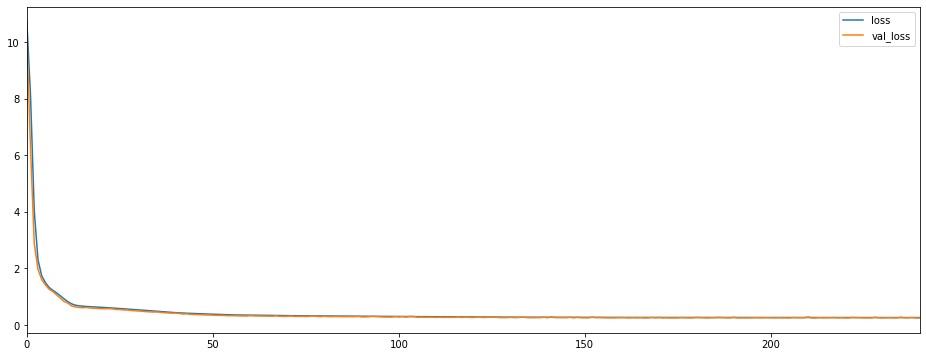

In [37]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predictions 
- will use the model to make preditions on the Test data

In [38]:
predictions = model.predict(X_test)

### Metrics
- Will use sklearn metrics to test the prediction accuracy for the data

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [40]:
print(explained_variance_score(y_test, predictions))

0.8230591058491274


In [41]:
print(mean_absolute_error(y_test, predictions))

0.387246415942827


In [42]:
print(mean_squared_error(y_test, predictions))

0.2488853393245192


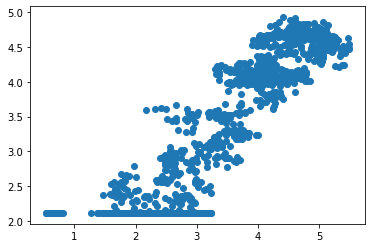

In [43]:
plt.scatter(y_test, predictions)

### Testing in random Data 

In [44]:
from random import randint
random_index = randint(1, len(working_data))
random_day = working_data.drop(["TNX Adj Close"], axis=1).iloc[random_index]

In [45]:
random_day

^GSPC              1164.079956
^DJI              10378.589844
^IXIC              2039.579956
^RUT                606.640015
^GSPC 20day MA     1124.910999
^DJI 20day MA     10027.695117
^IXIC 20day MA     1965.439502
^RUT 20day MA       582.289499
^GSPC upper        1172.636806
^DJI upper        10423.301300
^IXIC upper        2061.233482
^RUT upper          609.858287
^GSPC lower        1077.185191
^DJI lower         9632.088935
^IXIC lower        1869.645522
^RUT lower          554.720711
Name: 2004-11-10 00:00:00, dtype: float64

In [46]:
random_day = scalar.transform(random_day.values.reshape(1,len(random_day)))

In [47]:
model.predict(random_day)

array([[4.2604036]], dtype=float32)

In [48]:
working_data.iloc[random_index]

^GSPC              1164.079956
^DJI              10378.589844
^IXIC              2039.579956
^RUT                606.640015
^GSPC 20day MA     1124.910999
^DJI 20day MA     10027.695117
^IXIC 20day MA     1965.439502
^RUT 20day MA       582.289499
^GSPC upper        1172.636806
^DJI upper        10423.301300
^IXIC upper        2061.233482
^RUT upper          609.858287
^GSPC lower        1077.185191
^DJI lower         9632.088935
^IXIC lower        1869.645522
^RUT lower          554.720711
TNX Adj Close         4.253000
Name: 2004-11-10 00:00:00, dtype: float64

### Checking Todays Data
- Will use the model to predice what the TNX will be at close

In [49]:
working_data.iloc[working_data.index.argmax()]

^GSPC              3439.379883
^DJI              28245.849609
^IXIC             11531.799805
^RUT               1620.565430
^GSPC 20day MA     3398.741980
^DJI 20day MA     27960.328516
^IXIC 20day MA    11321.457471
^RUT 20day MA      1564.073254
^GSPC upper        3578.758831
^DJI upper        29269.320361
^IXIC upper       12096.992531
^RUT upper         1707.044111
^GSPC lower        3218.725129
^DJI lower        26651.336670
^IXIC lower       10545.922410
^RUT lower         1421.102398
TNX Adj Close         0.786000
Name: 2020-10-20 00:00:00, dtype: float64

In [53]:
today = working_data.drop("TNX Adj Close", axis=1).iloc[working_data.index.argmax()].values

In [54]:
today = scalar.transform(today.reshape(1,len(today)))

In [55]:
model.predict(today)

array([[2.1158326]], dtype=float32)